In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from xgboost import plot_importance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import pickle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train=pd.read_csv("/home/hybrid/unbalaced_20_80_dataset.csv",index_col=0)


In [5]:
train.shape

(7616509, 84)

(7616509, 84)


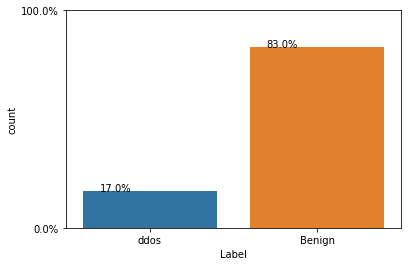

In [8]:
Y=train
#print(Y)
print(Y.shape)
total = len(Y)*1.

ax=sns.countplot(x="Label", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 2))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
#plt.savefig('foo.png')
plt.show()

In [9]:
pd.set_option('display.max_columns',85)
train.sample(n=5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1318289,172.31.66.42-178.170.198.39-445-58340-6,172.31.66.42,445,178.170.198.39,58340,6,20/02/2018 10:40:26,136,2,0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,14705.882352941177,1.360000e+02,0.000000e+00,136.0,136.0,136.0,1.360000e+02,0.000000e+00,136.0,136.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,40,0,14705.882353,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,0.000000,0.000000,0.0,0,0,0,0,0,0,2,0,0,0,255,-1,0,20,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
2554220,172.31.64.7-23.52.91.27-53086-80-6,172.31.64.7,53086,23.52.91.27,80,6,20/02/2018 02:15:06,38880379,7,8,421.0,1768.0,418.0,0.0,60.142857,157.80096,1460.0,0.0,221.0,512.101552,56.30089151137133,0.3857987083922202,2.777170e+06,4.541854e+06,10004082.0,1.0,30128657.0,5.021443e+06,5.477910e+06,10031055.0,345.0,38849540.0,5.549934e+06,5.202334e+06,10034945.0,1.0,0,0,0,0,152,208,0.180039,0.205759,0.0,1460.0,136.812500,374.317907,140113.895833,0,0,1,1,0,0,0,1,1.0,145.933333,60.142857,221.0,0,0,0,0,0,0,7,421,8,1768,8192,946,4,20,41381.666667,18298.576839,62511.0,30780.0,10001504.0,2232.657385,10004082.0,10000201.0,Benign
1134556,172.31.69.25-18.219.193.20-80-34740-6,18.219.193.20,34740,172.31.69.25,80,6,16/02/2018 11:22:56 PM,1500,1,1,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0,1333.33,1.500000e+03,0.000000e+00,1500.0,1500.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,32,32,666.666667,666.666667,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.000000,0.0,0,0,0,0,0,0,1,0,1,0,-1,225,0,0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,ddos
4528995,172.31.67.117-23.219.88.201-49837-80-6,23.219.88.201,80,172.31.67.117,49837,6,20/02/2018 08:37:43,20,1,1,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.000000,0.0,99999.99999999999,2.000000e+01,0.000000e+00,20.0,20.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,20,20,50000.000000,50000.000000,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,1,0,0,1.0,0.000000,0.000000,0.0,0,0,0,0,0,0,1,0,1,0,913,256,0,20,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,Benign
3045279,172.31.69.25-18.219.193.20-80-41670-6,172.31.69.25,80,18.219.193.20,41670,6,16/02/2018 11:24:04 PM,4582254,4,4,935.0,330.0,935.0,0.0,233.750000,467.50000,330.0,0.0,82.5,165.000000,276.065,1.74587,6.546077e+05,1.693425e+06,4494647.0,8.0,87599.0,2.919967e+04,2.582459e+04,49211.0,48.0,4543858.0,1.514619e+06,2.580894e+06,4494647.0,273.0,0,0,0,0,136,136,0.872933,0.872933,0.0,935.0,140.555556,317.277919,100665.277778,0,0,0,0,1,0,0,0,1.0,158.125000,233.750000,82.5,0,0,0,0,0,0,4,935,4,330,-1,211,1,0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,ddos


In [30]:
from sklearn import preprocessing 
for f in train.columns: 
    if train[f].dtype=='object': 
        label = preprocessing.LabelEncoder() 
        label.fit(list(train[f].values)) 
        train[f] = lbl.transform(list(train[f].values))
train.fillna((-999), inplace=True) 
train=np.array(train) 
train = train.astype(float) 

In [31]:
Y = train['Label']
X = train.drop("Label",axis=1)

In [32]:
print(train.shape)
print(X.shape)
print(Y.shape)

(7616509, 84)
(7616509, 83)
(7616509,)


In [33]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5103061, 83)
(5103061,)
(2513448, 83)
(2513448,)


In [47]:
#%%time

# fit model no training data
#model = XGBClassifier(n_jobs=-1)
#model.fit(X_train, y_train)

In [35]:
%%time
######Stochastic gradient boosting


model =XGBClassifier(max_depth=5,learning_rate=0.2,subsample=0.4,colsample_bytree=1.0,colsample_bylevel=0.1,n_estimators=200,n_jobs=-1)
model.fit(X_train, y_train)

CPU times: user 2h 14min 13s, sys: 41.4 s, total: 2h 14min 54s
Wall time: 5min 51s


In [36]:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.1,
       colsample_bytree=1.0, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.4)


In [37]:
y_pred = model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:",accuracy)
f1score=f1_score(y_test, y_pred)
print("f1-acore:",f1score)
cm=confusion_matrix(y_test, y_pred)
print("confusion matrix:\n",cm)
pr=precision_score(y_test,y_pred)
print("Precision:",pr)
rs=recall_score(y_test,y_pred)
print("Recall_score:",rs)
misclassified_samples = X_test[y_test != y_pred]
mc=misclassified_samples.shape[0]
print("Misclassified :",mc)

accuracy: 1.0
f1-acore: 1.0
confusion matrix:
 [[2086364       0]
 [      0  427084]]
Precision: 1.0
Recall_score: 1.0
Misclassified : 0


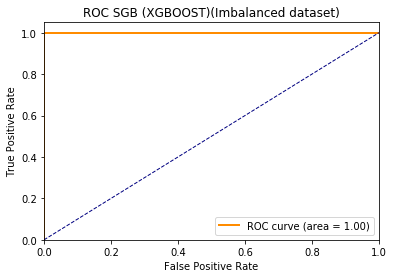

In [46]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC SGB (XGBOOST)(Imbalanced dataset)')
plt.legend(loc="lower right")
plt.show()

#####Feature Importance






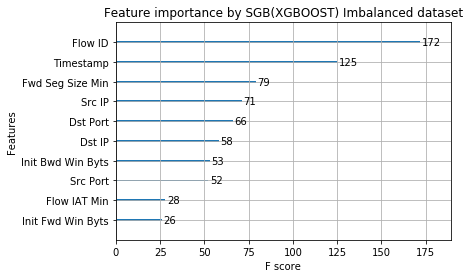

In [45]:
from xgboost import plot_importance
#plot_importance(model,max_num_features=15,)
#plot_importance(model)
plot_importance(model, ax=None, height=0.1, xlim=None, ylim=None, title='Feature importance by SGB(XGBOOST) Imbalanced dataset', xlabel='F score', ylabel='Features', importance_type='weight', max_num_features=10, grid=True,)
pyplot.show()

Stochastic Gradient BOOSTING

In [ ]:

%%time
model = XGBClassifier(max_depth=5,learning_rate=0.2,subsample=0.4,colsample_bytree=1.0,colsample_bylevel=0.1,n_estimators=200,n_jobs=-1)
model.fit(X_train, y_train)